In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import OneHotEncoder

In [89]:
url = "https://raw.githubusercontent.com/SNPraveenCh/UMBC-DATA606-Capstone/main/data/Airbnb_Data.csv"
df = pd.read_csv(url)

In [90]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [91]:
df.tail()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4,1.0,Real Bed,moderate,False,...,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0


In [92]:
df.size

2149219

In [93]:
df.shape

(74111, 29)

In [94]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [96]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [97]:
# checking number of null rows in each column
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [98]:
df['log_price'].value_counts()

5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: log_price, Length: 767, dtype: int64

In [99]:
(df['log_price'] == 0).sum()

1

In [100]:
df = df[df['log_price'] != 0]

In [101]:
df['log_price'].min(),df['log_price'].max()

(1.6094379124341005, 7.6004023345004)

In [102]:
df['price'] = np.exp(df['log_price'])

In [103]:
df['price'].value_counts()

150.0     2729
100.0     2707
75.0      2049
200.0     1923
50.0      1920
          ... 
1096.0       1
833.0        1
1177.0       1
472.0        1
577.0        1
Name: price, Length: 766, dtype: int64

In [104]:
df['price'].min(),df['price'].max()

(5.000000000000001, 1998.9999999999993)

In [105]:
interval_size = (df['log_price'].max()-df['log_price'].min()) / 5


In [106]:
def assign_price_range(log_price):
    if log_price < df['log_price'].min() + interval_size:
        return 'Very Low'
    elif log_price < df['log_price'].min() + 2*interval_size:
        return 'Low'
    elif log_price < df['log_price'].min() + 3*interval_size:
        return 'Medium'
    elif log_price < df['log_price'].min() + 4*interval_size:
        return 'High'
    else:
        return 'Very High'

In [107]:
df['price_range'] = df['log_price'].apply(assign_price_range)


In [108]:
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['beds'].fillna(df['beds'].mode()[0], inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].mode()[0], inplace=True)
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
df['host_since'].fillna(df['host_since'].mode()[0], inplace=True)
df['first_review'].fillna('', inplace=True)
df['last_review'].fillna('', inplace=True)
df['neighbourhood'].fillna('', inplace=True)
df['thumbnail_url'].fillna('', inplace=True)
df['zipcode'].fillna('', inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)


In [123]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
price                     0
price_range               0
dtype: int64

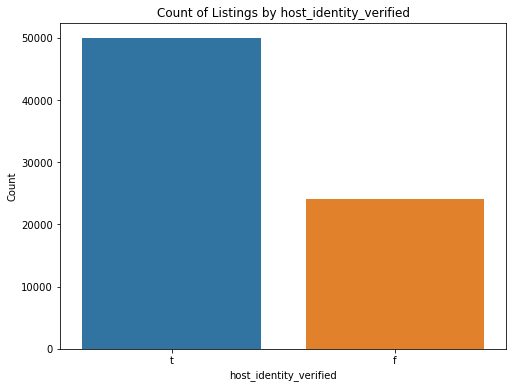

In [165]:
plt.figure(figsize=(8, 6))
sns.countplot(x='host_identity_verified', data=df)
plt.title('Count of Listings by host_identity_verified')
plt.xlabel('host_identity_verified')
plt.ylabel('Count')
plt.show()


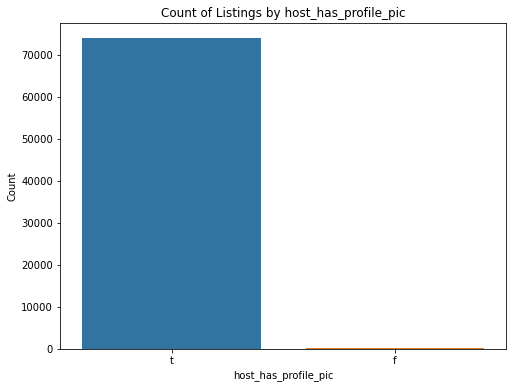

In [163]:
plt.figure(figsize=(8, 6))
sns.countplot(x='host_has_profile_pic', data=df)
plt.title('Count of Listings by host_has_profile_pic')
plt.xlabel('host_has_profile_pic')
plt.ylabel('Count')
plt.show()


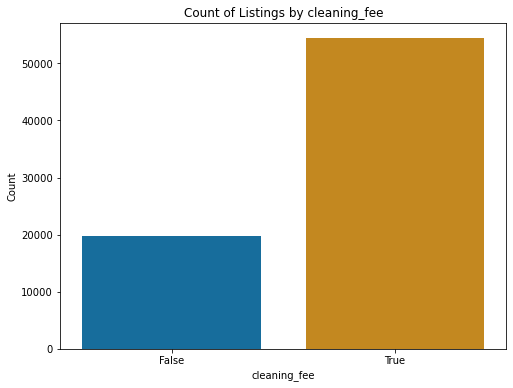

In [164]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cleaning_fee', data=df, palette='colorblind')
plt.title('Count of Listings by cleaning_fee')
plt.xlabel('cleaning_fee')
plt.ylabel('Count')
plt.show()


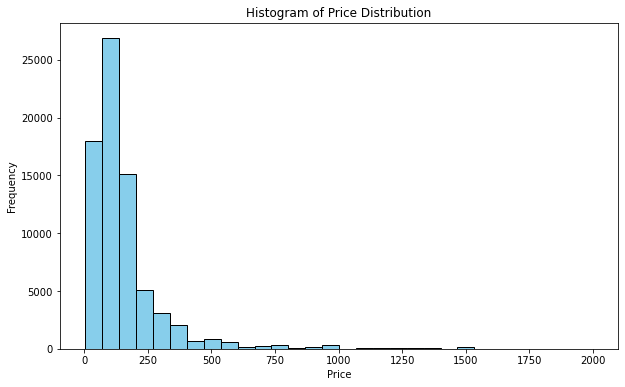

In [112]:

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

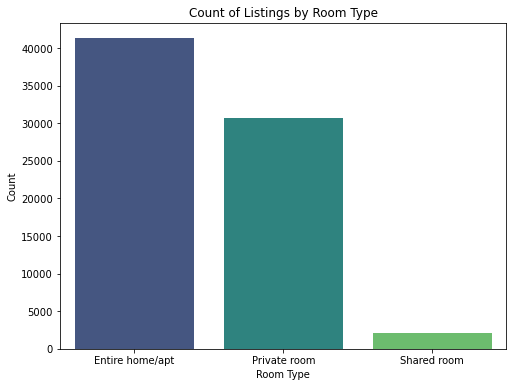

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='viridis')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


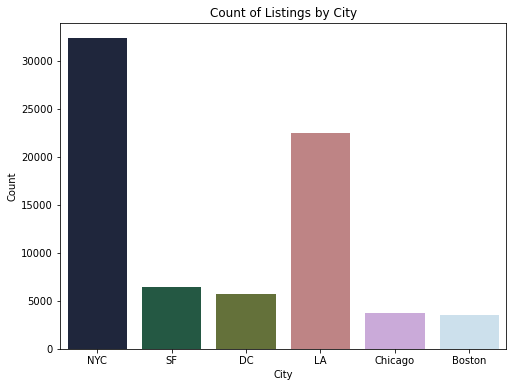

In [156]:
plt.figure(figsize=(8, 6))
sns.countplot(x='city', data=df, palette='cubehelix')
plt.title('Count of Listings by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


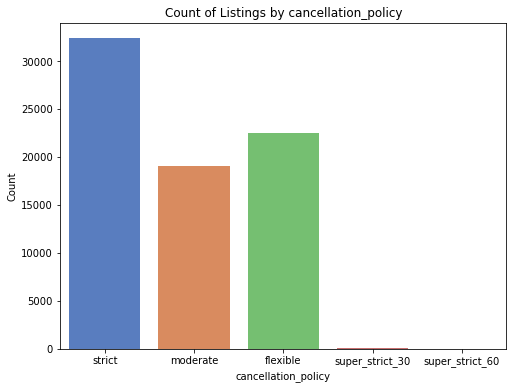

In [161]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cancellation_policy', data=df, palette='muted')
plt.title('Count of Listings by cancellation_policy')
plt.xlabel('cancellation_policy')
plt.ylabel('Count')
plt.show()

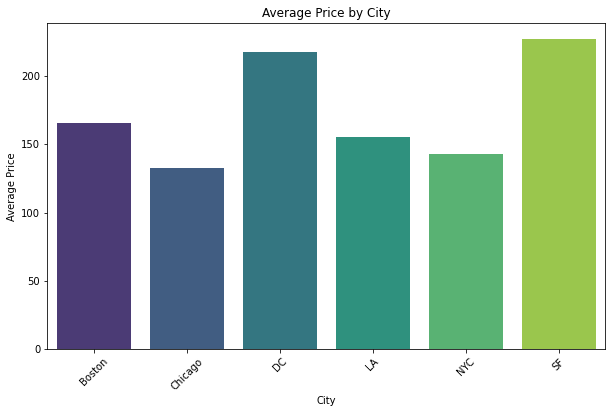

In [166]:
avg_price_by_city = df.groupby('city')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='price', data=avg_price_by_city, palette='viridis')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

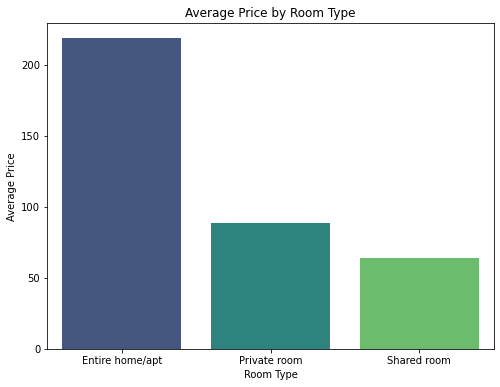

In [167]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=avg_price_by_room_type, palette='viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

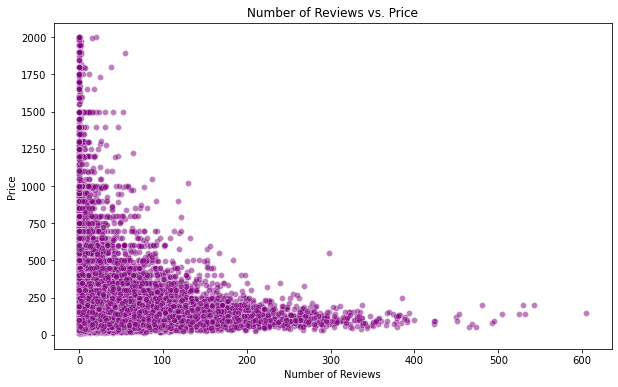

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5, color='purple')
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


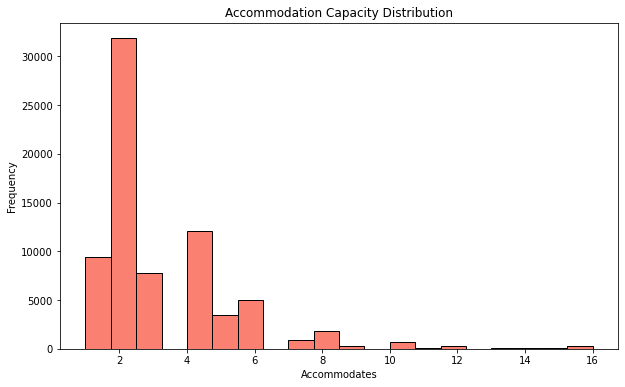

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(df['accommodates'], bins=20, color='salmon', edgecolor='black')
plt.title('Accommodation Capacity Distribution')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()


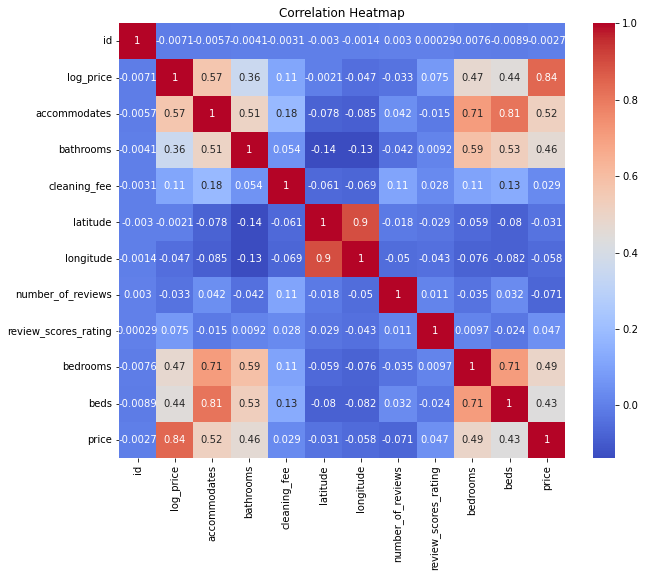

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


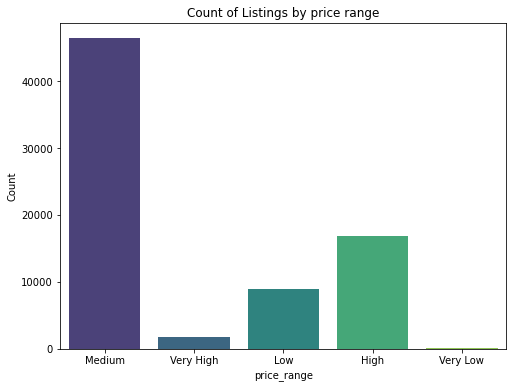

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Count of Listings by price range')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()


In [130]:
numerical_features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews','review_scores_rating','beds']
categorical_features = ['property_type','neighbourhood','city','room_type','bed_type','cancellation_policy',
                        'cleaning_fee']
target = 'price_range'

encoder = OneHotEncoder(sparse=False)
encoded_categories = encoder.fit_transform(df[categorical_features])

X = pd.concat([df[numerical_features], pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_features))], axis=1)
y = df[target]


In [134]:
X.dropna(inplace=True)
y = y[X.index]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

In [151]:
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, rf_y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.6727836999055458
F1 Score: 0.635089434975935


In [152]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

/Users/praveen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, lr_y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.6828363243826744
F1 Score: 0.626783820647724
